<a href="https://colab.research.google.com/github/cynthiachen28/2021WS_IntroML/blob/main/Personality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# test for saving the file to Github

In [ ]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# Load data
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df.duplicated().sum()


0

In [ ]:
df['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
#Calculating age by year of birth 
df["Year_Birth"] = 2021-df["Year_Birth"]

In [ ]:
#combining all amount spent in entire 2 years
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [ ]:
df.drop(['Z_CostContact','Z_Revenue'],axis = 1,inplace = True)
df.rename(columns = {'Year_Birth':'Age'},inplace = True)
df

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent
0,5524,64,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617
1,2174,67,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27
2,4141,56,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776
3,6182,37,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53
4,5324,40,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,54,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1341
2236,4001,75,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,444
2237,7270,40,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,1241
2238,8235,65,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,843


In [ ]:
df.isnull().sum()

ID                     0
Age                    0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Spent                  0
dtype: int64

In [ ]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [ ]:
df['Education'].count()

2216

In [ ]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
df['Marital_Status'].count()

2216

In [ ]:
df.drop(df[df.Marital_Status.isin(["YOLO", "Absurd", "Alone"])].index)

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent
0,5524,64,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617
1,2174,67,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27
2,4141,56,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776
3,6182,37,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53
4,5324,40,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,54,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1341
2236,4001,75,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,444
2237,7270,40,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,1241
2238,8235,65,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,843


In [ ]:
df_clean = df.drop(df[df.Marital_Status.isin(["YOLO", "Absurd", "Alone"])].index)

In [ ]:
df_clean['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Name: Marital_Status, dtype: int64

In [ ]:
df_clean['AcceptedCmp1'].value_counts()

0    2068
1     141
Name: AcceptedCmp1, dtype: int64

In [ ]:
df_clean['AcceptedCmp2'].value_counts()

0    2179
1      30
Name: AcceptedCmp2, dtype: int64

In [ ]:
df_clean['AcceptedCmp3'].value_counts()

0    2047
1     162
Name: AcceptedCmp3, dtype: int64

In [ ]:
df_clean['AcceptedCmp4'].value_counts()

0    2045
1     164
Name: AcceptedCmp4, dtype: int64

In [ ]:
df_clean['AcceptedCmp5'].value_counts()

0    2048
1     161
Name: AcceptedCmp5, dtype: int64

In [ ]:
df_clean['Response'].value_counts()

0    1879
1     330
Name: Response, dtype: int64

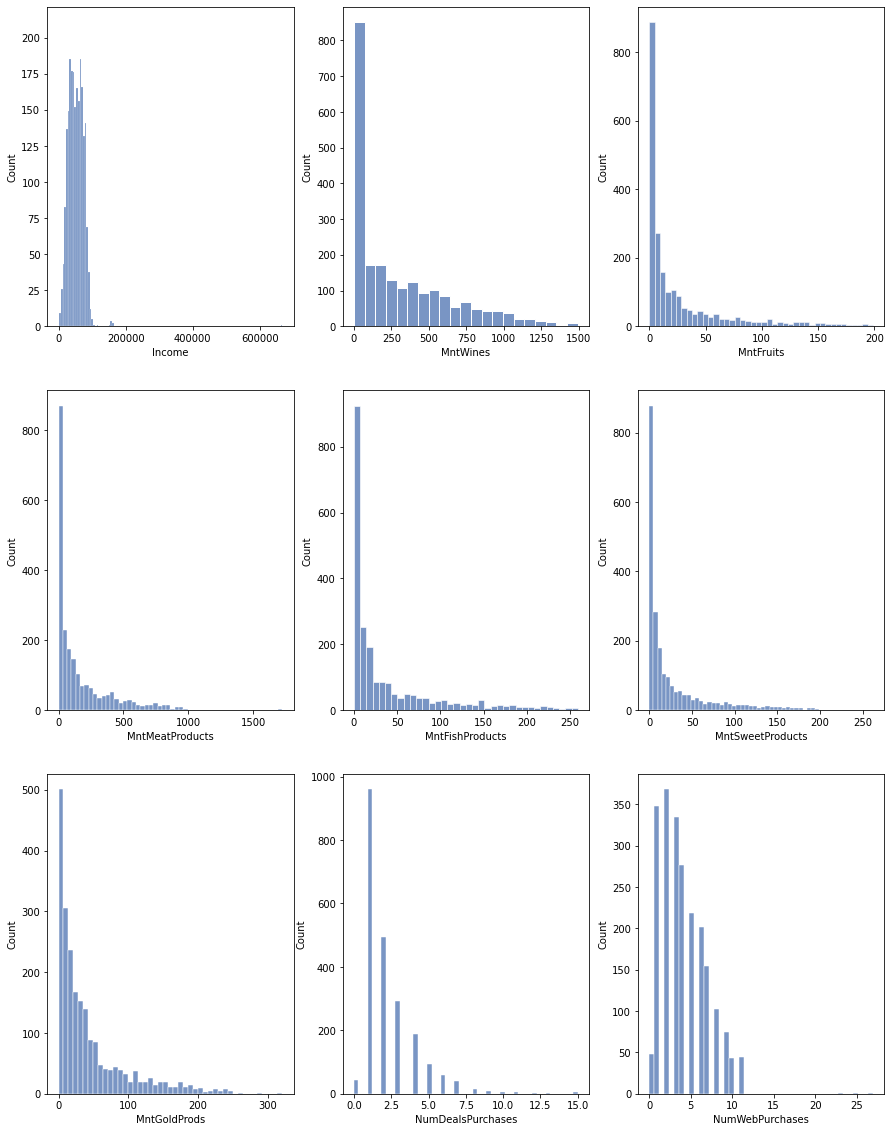

In [ ]:
f, axes = plt.subplots(3, 3,figsize=(15, 20))
sns.set_theme(style="whitegrid")
sns.histplot(x=df['Income'],ax=axes[0,0])
sns.histplot(x=df['Recency'],ax=axes[0,0])
sns.histplot(x=df['MntWines'],ax=axes[0,1])
sns.histplot(x=df['MntFruits'],ax=axes[0,2])
sns.histplot(x=df['MntMeatProducts'],ax=axes[1,0])
sns.histplot(x=df['MntFishProducts'],ax=axes[1,1])
sns.histplot(x=df['MntSweetProducts'],ax=axes[1,2])
sns.histplot(x=df['MntGoldProds'],ax=axes[2,0])
sns.histplot(x=df['NumDealsPurchases'],ax=axes[2,1])
sns.histplot(x=df['NumWebPurchases'],ax=axes[2,2])

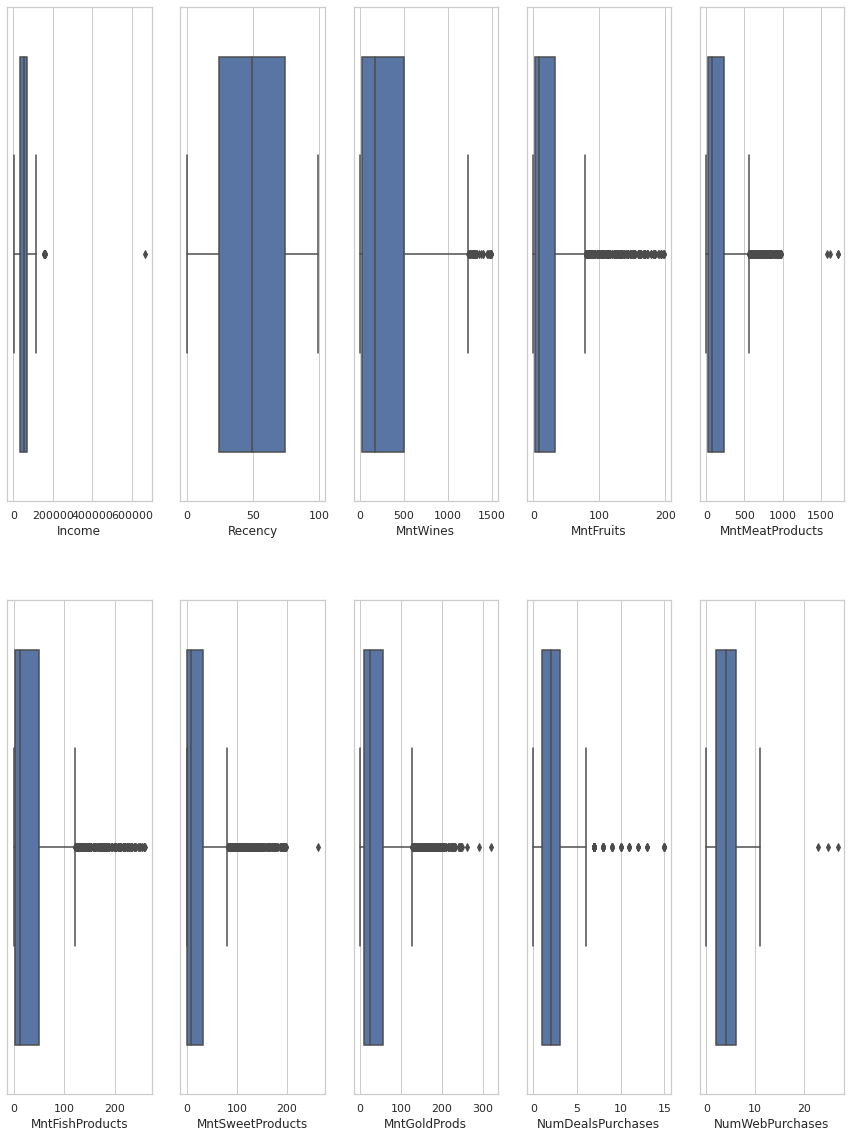

In [ ]:
#Boxplot of variables

f, axes = plt.subplots(2, 5,figsize=(15, 20))
sns.set_theme(style="darkgrid")
sns.boxplot(x=df['Income'],ax=axes[0,0])
sns.boxplot(x=df['Recency'],ax=axes[0,1])
sns.boxplot(x=df['MntWines'],ax=axes[0,2])
sns.boxplot(x=df['MntFruits'],ax=axes[0,3])
sns.boxplot(x=df['MntMeatProducts'],ax=axes[0,4])
sns.boxplot(x=df['MntFishProducts'],ax=axes[1,0])
sns.boxplot(x=df['MntSweetProducts'],ax=axes[1,1])
sns.boxplot(x=df['MntGoldProds'],ax=axes[1,2])
sns.boxplot(x=df['NumDealsPurchases'],ax=axes[1,3])
sns.boxplot(x=df['NumWebPurchases'],ax=axes[1,4])

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2209 non-null   int64  
 1   Age                  2209 non-null   int64  
 2   Education            2209 non-null   object 
 3   Marital_Status       2209 non-null   object 
 4   Income               2209 non-null   float64
 5   Kidhome              2209 non-null   int64  
 6   Teenhome             2209 non-null   int64  
 7   Dt_Customer          2209 non-null   object 
 8   Recency              2209 non-null   int64  
 9   MntWines             2209 non-null   int64  
 10  MntFruits            2209 non-null   int64  
 11  MntMeatProducts      2209 non-null   int64  
 12  MntFishProducts      2209 non-null   int64  
 13  MntSweetProducts     2209 non-null   int64  
 14  MntGoldProds         2209 non-null   int64  
 15  NumDealsPurchases    2209 non-null   i

Text(0.5, 1.0, 'Kidhome Status grouped by Education')

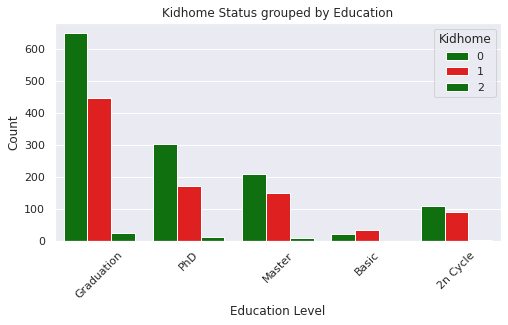

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Education', data = df, hue='Kidhome', palette=['green','red'])
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Kidhome Status grouped by Education')

Text(0.5, 1.0, 'Teenhome Status grouped by Education')

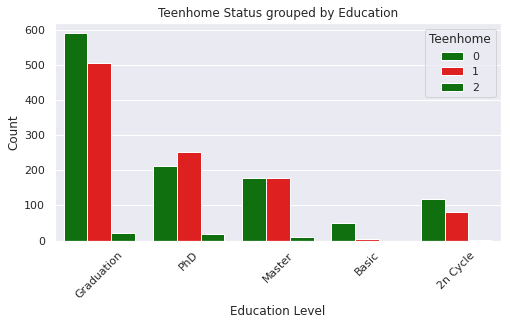

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Education', data = df, hue='Teenhome', palette=['green','red'])
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Teenhome Status grouped by Education')

Text(0.5, 1.0, 'Kidhome Status grouped by Education')

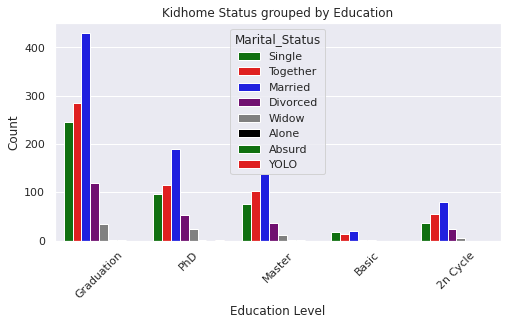

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Education', data = df, hue='Marital_Status', palette=['green','red',"blue","purple","grey","black"])
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Kidhome Status grouped by Education')

Text(0.5, 1.0, 'Kidhome Status grouped by Education')

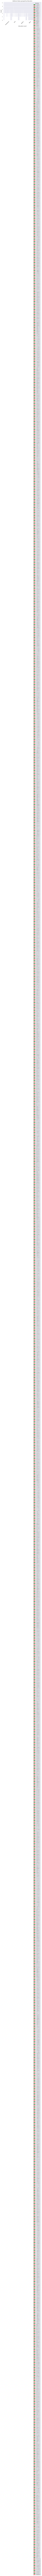

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Education', data = df, hue='Income', palette=['green','red'])
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Kidhome Status grouped by Education')